In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
columns = pd.read_csv('columns.csv')
columns = columns[columns['filename'] != 'recommendations.csv']

In [62]:
data = pd.read_csv('certificates.csv')

C:\Users\Entwan\AppData\Local\Temp\ipykernel_23064\667726140.py:1: DtypeWarning: Columns (15,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('certificates.csv')


In [5]:
columns.head()

,filename,column,datatype,description
0,certificates.csv,LMK_KEY,string,Individual lodgement identifier. Guaranteed to...
1,certificates.csv,ADDRESS1,string,First line of the address
2,certificates.csv,ADDRESS2,string,Second line of the address
3,certificates.csv,ADDRESS3,string,Third line of the address
4,certificates.csv,POSTCODE,string,The postcode of the property


In [15]:
data.head()

,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,...,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,UPRN,UPRN_SOURCE
0,363846102022020051116205147588790,"3, Roundwood Road",unknown,unknown,HP6 6NA,9424047668,C,C,75,75,...,"3, Roundwood Road",Buckinghamshire,chesham and amersham,amersham,england and wales: 1950-1966,2020-05-11 16:20:51,rental (social),11.0,100080502901.0,address matched
1,1803544716032020061615324758978903,"157, Vine Road",stoke poges,unknown,SL2 4DH,1338940778,D,C,57,76,...,"157, Vine Road, Stoke Poges",Buckinghamshire,beaconsfield,slough,england and wales: 1950-1966,2020-06-16 15:32:47,owner-occupied,11.0,100080496093.0,address matched
2,2b3d6ba58c491595da25c3672a70fe1b83430f2d6fb2e6...,42 Sycamore Road,unknown,unknown,HP12 4TL,10001515203,C,B,71,87,...,42 Sycamore Road,Buckinghamshire,wycombe,high wycombe,england and wales: 1967-1975,2021-09-01 09:31:38,Owner-occupied,13.0,100080552542.0,energy assessor
3,2b3cffa2899d6e8873314bab12e4a4264fbe514d85b0a1...,12 Somerset Way,unknown,unknown,SL0 9AF,10001350864,E,C,50,71,...,12 Somerset Way,Buckinghamshire,beaconsfield,iver,england and wales: 1930-1949,2021-09-19 22:53:03,Owner-occupied,29.0,100080488176.0,energy assessor
4,2b3fa69a8f1d5fd13be85914fb2aee4752ba91dc981e6d...,462 Waterside,unknown,unknown,HP5 1QF,10001532261,C,C,70,78,...,462 Waterside,Buckinghamshire,chesham and amersham,chesham,england and wales: 1976-1982,2021-08-19 16:42:01,Rented (social),6.0,100080515161.0,energy assessor


In [63]:
data.shape

(64698, 92)

Target column is ENERGY_CONSUMPTION_CURRENT

MemoryError: Unable to allocate 321. MiB for an array with shape (64698, 5198) and data type bool

In [64]:
print(data.select_dtypes(include=['object', 'category']).nunique())

LMK_KEY                     64698
ADDRESS1                    55917
ADDRESS2                     5198
ADDRESS3                     1199
POSTCODE                    11878
CURRENT_ENERGY_RATING           7
POTENTIAL_ENERGY_RATING         7
PROPERTY_TYPE                   5
BUILT_FORM                      7
INSPECTION_DATE              1620
LOCAL_AUTHORITY                 1
CONSTITUENCY                   11
COUNTY                          1
LODGEMENT_DATE               1622
TRANSACTION_TYPE               17
ENERGY_TARIFF                  11
MAINS_GAS_FLAG                  2
FLOOR_LEVEL                    32
FLAT_TOP_STOREY                 2
GLAZED_TYPE                    10
GLAZED_AREA                     6
HOTWATER_DESCRIPTION           43
HOT_WATER_ENERGY_EFF            5
HOT_WATER_ENV_EFF               5
FLOOR_DESCRIPTION             105
FLOOR_ENERGY_EFF                6
FLOOR_ENV_EFF                   5
WINDOWS_DESCRIPTION            17
WINDOWS_ENERGY_EFF              5
WINDOWS_ENV_EF

In [65]:
high_cardinality_columns = ['ADDRESS1', 'ADDRESS2', 'ADDRESS3', 'POSTCODE', 'ADDRESS', 'LODGEMENT_DATE','ADDRESS','POSTTOWN','LODGEMENT_DATETIME','LODGEMENT_DATE','INSPECTION_DATE',]
data = data.drop(columns=high_cardinality_columns)

In [71]:
data_types = [data.dtypes]
print(data_types)

[LMK_KEY                          object
BUILDING_REFERENCE_NUMBER         int64
CURRENT_ENERGY_RATING            object
POTENTIAL_ENERGY_RATING          object
CURRENT_ENERGY_EFFICIENCY         int64
                                 ...   
TENURE                           object
FIXED_LIGHTING_OUTLETS_COUNT    float64
LOW_ENERGY_FIXED_LIGHT_COUNT    float64
UPRN                            float64
UPRN_SOURCE                      object
Length: 83, dtype: object]


In [72]:
data = data.apply(pd.to_numeric, errors='coerce')

In [73]:
print(data.dtypes)

LMK_KEY                         float64
BUILDING_REFERENCE_NUMBER         int64
CURRENT_ENERGY_RATING           float64
POTENTIAL_ENERGY_RATING         float64
CURRENT_ENERGY_EFFICIENCY         int64
                                 ...   
TENURE                          float64
FIXED_LIGHTING_OUTLETS_COUNT    float64
LOW_ENERGY_FIXED_LIGHT_COUNT    float64
UPRN                            float64
UPRN_SOURCE                     float64
Length: 83, dtype: object


In [74]:
# Calculate the percentage of missing values per column
missing_percentage = data.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

LMK_KEY                          91.502056
CURRENT_ENERGY_RATING           100.000000
POTENTIAL_ENERGY_RATING         100.000000
PROPERTY_TYPE                   100.000000
BUILT_FORM                      100.000000
                                   ...    
TENURE                          100.000000
FIXED_LIGHTING_OUTLETS_COUNT      7.210424
LOW_ENERGY_FIXED_LIGHT_COUNT     88.857461
UPRN                              4.088225
UPRN_SOURCE                     100.000000
Length: 64, dtype: float64


In [75]:
def handle_missing_values(data, threshold=0.5):
    """
    Handles missing values in a dataset:
    - Drops columns with more than a specified threshold of missing values.
    - Fills remaining missing values with median for numeric columns and mode for categorical columns.
    
    Parameters:
        data (pd.DataFrame): The input dataset.
        threshold (float): The proportion of missing values above which columns are dropped (default 0.5).
    
    Returns:
        pd.DataFrame: The cleaned dataset.
    """
    # Step 1: Drop columns with high missing values
    missing_percentage = data.isnull().mean()  # Calculate percentage of missing values
    columns_to_drop = missing_percentage[missing_percentage > threshold].index
    print(f"Dropping columns with more than {threshold*100}% missing values: {list(columns_to_drop)}")
    data = data.drop(columns=columns_to_drop)
    
    # Step 2: Fill numeric columns with median
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].median())
    
    # Step 3: Fill categorical columns with mode
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].mode()[0])  # Use the most frequent value
    
    return data

# Example usage
data = handle_missing_values(data, threshold=0.5)

# Check the result
print(data.isnull().sum()) 

Dropping columns with more than 50.0% missing values: ['LMK_KEY', 'CURRENT_ENERGY_RATING', 'POTENTIAL_ENERGY_RATING', 'PROPERTY_TYPE', 'BUILT_FORM', 'LOCAL_AUTHORITY', 'CONSTITUENCY', 'COUNTY', 'TRANSACTION_TYPE', 'ENERGY_TARIFF', 'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'FLAT_TOP_STOREY', 'FLAT_STOREY_COUNT', 'MAIN_HEATING_CONTROLS', 'GLAZED_TYPE', 'GLAZED_AREA', 'HOTWATER_DESCRIPTION', 'HOT_WATER_ENERGY_EFF', 'HOT_WATER_ENV_EFF', 'FLOOR_DESCRIPTION', 'FLOOR_ENERGY_EFF', 'FLOOR_ENV_EFF', 'WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF', 'WINDOWS_ENV_EFF', 'WALLS_DESCRIPTION', 'WALLS_ENERGY_EFF', 'WALLS_ENV_EFF', 'SECONDHEAT_DESCRIPTION', 'SHEATING_ENERGY_EFF', 'SHEATING_ENV_EFF', 'ROOF_DESCRIPTION', 'ROOF_ENERGY_EFF', 'ROOF_ENV_EFF', 'MAINHEAT_DESCRIPTION', 'MAINHEAT_ENERGY_EFF', 'MAINHEAT_ENV_EFF', 'MAINHEATCONT_DESCRIPTION', 'MAINHEATC_ENERGY_EFF', 'MAINHEATC_ENV_EFF', 'LIGHTING_DESCRIPTION', 'LIGHTING_ENERGY_EFF', 'LIGHTING_ENV_EFF', 'MAIN_FUEL', 'HEAT_LOSS_CORRIDOR', 'UNHEATED_CORRIDOR_LENGTH'

In [76]:
# Define target and features
X = data.drop(columns=['ENERGY_CONSUMPTION_CURRENT'])  # Replace 'target_column' with your target variable name
y = data['ENERGY_CONSUMPTION_CURRENT']  # Replace with your target variable name

In [77]:
# Convert categorical features if needed
X = pd.get_dummies(X, drop_first=True)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
encoder = OneHotEncoder(sparse=True)
X_train_sparse = encoder.fit_transform(X_train)  # sparse matrix


C:\Users\Entwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [79]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

KeyboardInterrupt: 

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
top_features = feature_importance_df.head(10)['Feature'].tolist()
X_top = X[top_features]

print(f"Top Features: {top_features}")

In [6]:
print(data.dtypes)

LMK_KEY                          object
ADDRESS1                         object
ADDRESS2                         object
ADDRESS3                         object
POSTCODE                         object
                                 ...   
TENURE                           object
FIXED_LIGHTING_OUTLETS_COUNT    float64
LOW_ENERGY_FIXED_LIGHT_COUNT    float64
UPRN                            float64
UPRN_SOURCE                      object
Length: 92, dtype: object


In [7]:
# Identify columns with mixed data types in object columns
mixed_type_columns = {}

for col in data.select_dtypes(include='object'):
    unique_types = data[col].apply(type).unique()
    if len(unique_types) > 1:
        mixed_type_columns[col] = unique_types

# Replace mixed datatypes with "unknown" for the identified columns
for col in mixed_type_columns.keys():
    data[col] = data[col].fillna("unknown").astype(str).str.strip().str.lower()

# Verify the result by checking the dataframe info
data_info_after_cleaning = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64698 entries, 0 to 64697
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LMK_KEY                        64698 non-null  object 
 1   ADDRESS1                       64698 non-null  object 
 2   ADDRESS2                       64698 non-null  object 
 3   ADDRESS3                       64698 non-null  object 
 4   POSTCODE                       64698 non-null  object 
 5   BUILDING_REFERENCE_NUMBER      64698 non-null  int64  
 6   CURRENT_ENERGY_RATING          64698 non-null  object 
 7   POTENTIAL_ENERGY_RATING        64698 non-null  object 
 8   CURRENT_ENERGY_EFFICIENCY      64698 non-null  int64  
 9   POTENTIAL_ENERGY_EFFICIENCY    64698 non-null  int64  
 10  PROPERTY_TYPE                  64698 non-null  object 
 11  BUILT_FORM                     64698 non-null  object 
 12  INSPECTION_DATE                64698 non-null 

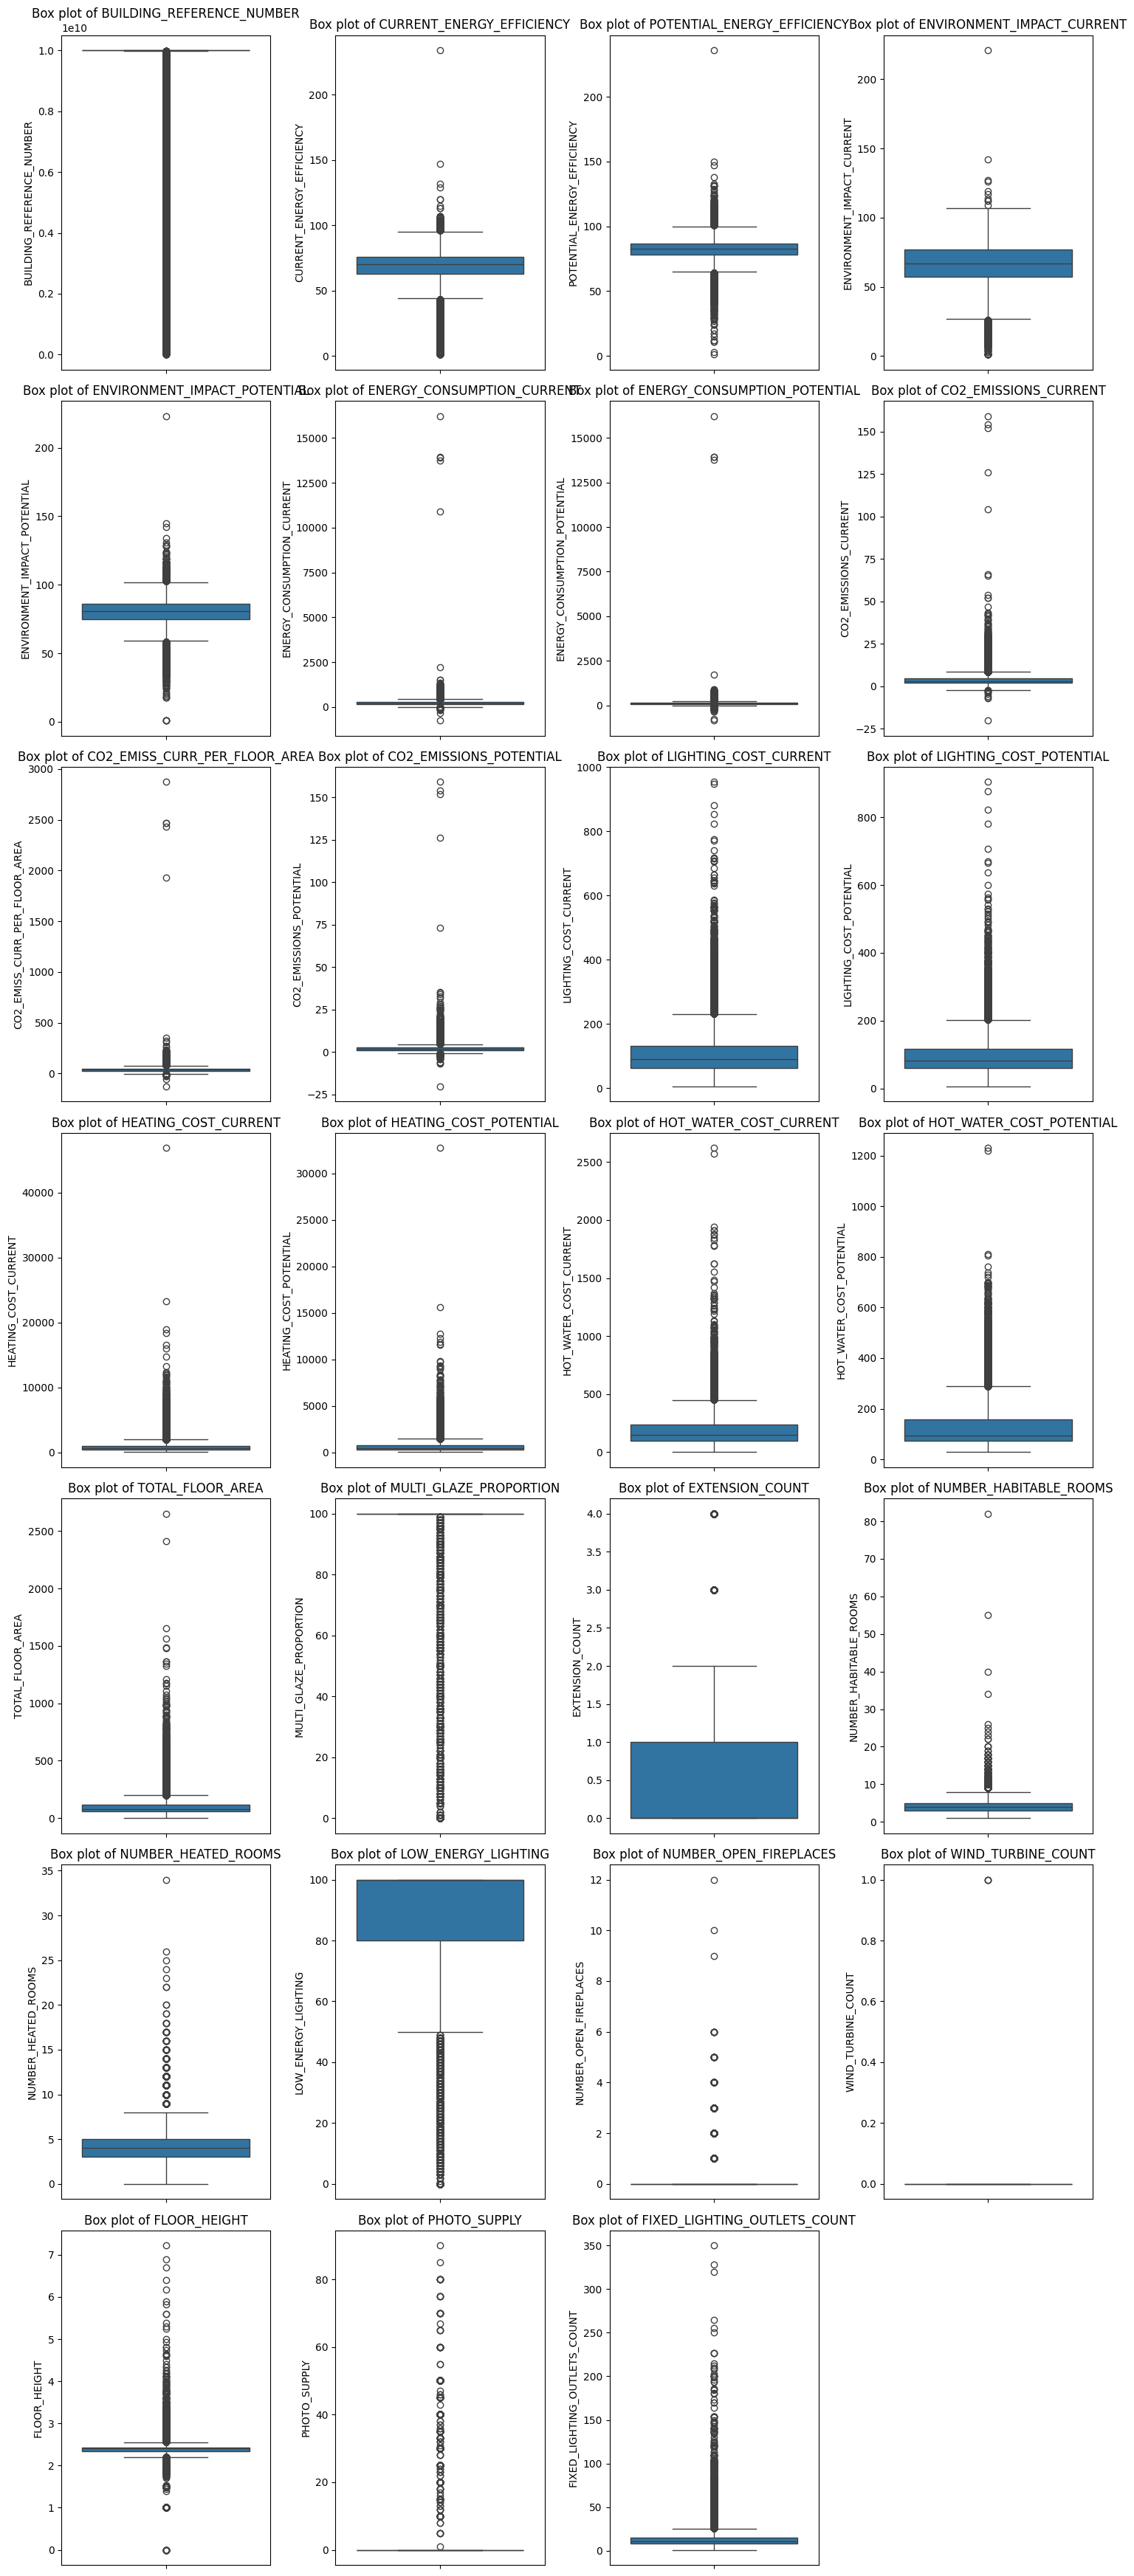

In [14]:
# Select numerical columns from the dataframe
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for the subplot grid
num_cols = 4  
num_rows = int(np.ceil(len(numerical_cols) / num_cols))

# Create box plots for each numerical column
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # Dynamically adjusting grid
    sns.boxplot(data[col])
    plt.title(f"Box plot of {col}")
    plt.tight_layout()

plt.show()

In [17]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = data[numerical_cols].apply(zscore)

# Define a threshold for outliers (e.g., |z| > 3)
threshold = 3
outliers = (z_scores.abs() > threshold)

# Summary of outliers
outlier_summary = outliers.sum().sort_values(ascending=False)
print(outlier_summary)

BUILDING_REFERENCE_NUMBER        2812
MULTI_GLAZE_PROPORTION           2100
LOW_ENERGY_LIGHTING              1894
FLOOR_HEIGHT                     1457
TOTAL_FLOOR_AREA                 1123
HEATING_COST_CURRENT             1092
LIGHTING_COST_CURRENT            1059
FIXED_LIGHTING_OUTLETS_COUNT     1054
HEATING_COST_POTENTIAL           1046
HOT_WATER_COST_POTENTIAL         1006
HOT_WATER_COST_CURRENT            994
LIGHTING_COST_POTENTIAL           932
NUMBER_OPEN_FIREPLACES            890
EXTENSION_COUNT                   877
CO2_EMISSIONS_CURRENT             864
CURRENT_ENERGY_EFFICIENCY         818
PHOTO_SUPPLY                      799
POTENTIAL_ENERGY_EFFICIENCY       793
CO2_EMISSIONS_POTENTIAL           744
NUMBER_HABITABLE_ROOMS            713
NUMBER_HEATED_ROOMS               689
ENVIRONMENT_IMPACT_POTENTIAL      584
ENVIRONMENT_IMPACT_CURRENT        360
ENERGY_CONSUMPTION_CURRENT        338
CO2_EMISS_CURR_PER_FLOOR_AREA     291
ENERGY_CONSUMPTION_POTENTIAL      114
WIND_TURBINE

In [19]:
outlier_percentage = (outliers.sum() / len(data)) * 100
print(outlier_percentage.sort_values(ascending=False))

BUILDING_REFERENCE_NUMBER        4.346348
MULTI_GLAZE_PROPORTION           3.245850
LOW_ENERGY_LIGHTING              2.927448
FLOOR_HEIGHT                     2.252002
TOTAL_FLOOR_AREA                 1.735757
HEATING_COST_CURRENT             1.687842
LIGHTING_COST_CURRENT            1.636836
FIXED_LIGHTING_OUTLETS_COUNT     1.629108
HEATING_COST_POTENTIAL           1.616742
HOT_WATER_COST_POTENTIAL         1.554917
HOT_WATER_COST_CURRENT           1.536369
LIGHTING_COST_POTENTIAL          1.440539
NUMBER_OPEN_FIREPLACES           1.375622
EXTENSION_COUNT                  1.355529
CO2_EMISSIONS_CURRENT            1.335435
CURRENT_ENERGY_EFFICIENCY        1.264336
PHOTO_SUPPLY                     1.234969
POTENTIAL_ENERGY_EFFICIENCY      1.225695
CO2_EMISSIONS_POTENTIAL          1.149958
NUMBER_HABITABLE_ROOMS           1.102043
NUMBER_HEATED_ROOMS              1.064948
ENVIRONMENT_IMPACT_POTENTIAL     0.902655
ENVIRONMENT_IMPACT_CURRENT       0.556431
ENERGY_CONSUMPTION_CURRENT       0

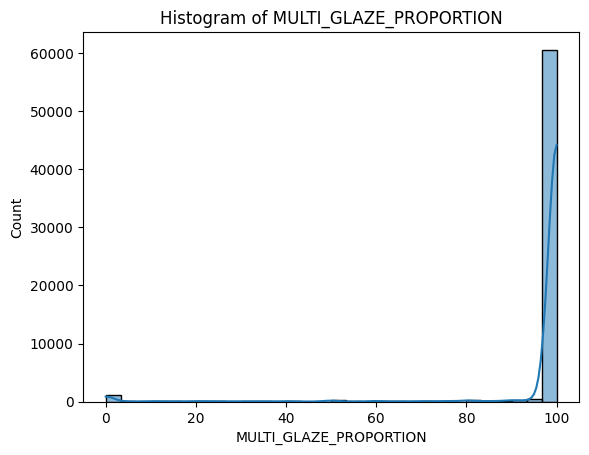

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting histogram
sns.histplot(data['MULTI_GLAZE_PROPORTION'], kde=True, bins=30)
plt.title('Histogram of MULTI_GLAZE_PROPORTION')
plt.show()

In [23]:
print(data['MULTI_GLAZE_PROPORTION'].describe())


count    64698.000000
mean        96.360367
std         16.718178
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: MULTI_GLAZE_PROPORTION, dtype: float64


IQR Rule:
Outliers are values outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR].

In [25]:
Q1 = data['MULTI_GLAZE_PROPORTION'].quantile(0.25)
Q3 = data['MULTI_GLAZE_PROPORTION'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['MULTI_GLAZE_PROPORTION'] < Q1 - 1.5 * IQR) | (data['MULTI_GLAZE_PROPORTION'] > Q3 + 1.5 * IQR)]
print(outliers)

                                                 LMK_KEY  \
14     3291afb17bfa6bc33d5c8eeb31c220fe4660e2689566c1...   
61     383a2002595a21ee6fcdefc4872ba643aa6a48a63351bb...   
79     39e103260e875b8f41a4db539a168ddc593dde63a6702e...   
91     3a5518bc193b6fc75c52a7f02fc8fc7c506a8c03b9e041...   
99     3ad869d77f16453a8b590116cf7b074f51a8bdb98c9a8a...   
...                                                  ...   
64582  e4ef342f74286a221e6e59747bc69121c9281b87180ffc...   
64586  e5d1907b4ca0f1808929b9416939f35cd8ab484907c9a6...   
64627  f0eb23fde89ed7c9dca48b6d04b60ee2472c35696d29b2...   
64655  f85037821b77b480460f35c436488a3214f9e5aed0a80d...   
64675  fc71193095c13e154caac3ad2b86cb0a0846d9493d871a...   

                           ADDRESS1        ADDRESS2          ADDRESS3  \
14         61 NORTHUMBERLAND AVENUE         unknown           unknown   
61                   3 Rosewood Way  farnham common           unknown   
79                   40 HELLYER WAY         unknown         

In [26]:
data['z_score'] = zscore(data['MULTI_GLAZE_PROPORTION'])
extreme_outliers = data[data['z_score'].abs() > 3]
print(extreme_outliers)

                                                 LMK_KEY           ADDRESS1  \
79     39e103260e875b8f41a4db539a168ddc593dde63a6702e...     40 HELLYER WAY   
91     3a5518bc193b6fc75c52a7f02fc8fc7c506a8c03b9e041...   18 Pearson Close   
99     3ad869d77f16453a8b590116cf7b074f51a8bdb98c9a8a...        MEADOW VIEW   
119    3bdb1816bc2fa17a3e4c5626b23678693c3a1f53d483a6...  21 STRETTON CLOSE   
184    3f94638d203c244fb5bbfe99fd55345d518bca7cf1c77b...        HORTON HALL   
...                                                  ...                ...   
64502  d2bf412cd1b2a088a613cf246aa382e4f2ec7db4223e91...     9 Cross Meadow   
64538  d94f8a68d2fc438cc96ee33459d35a01d22fae0cca6ef9...       71 Bois Lane   
64549  dafc25dbb18770ac6f47df3e6c6468929f81e5cf07088e...   26 Chiltern Road   
64586  e5d1907b4ca0f1808929b9416939f35cd8ab484907c9a6...    Boss Lane House   
64675  fc71193095c13e154caac3ad2b86cb0a0846d9493d871a...         Hill House   

             ADDRESS2          ADDRESS3  POSTCODE  

In [24]:
print(data.sort_values(by='MULTI_GLAZE_PROPORTION', ascending=False).head(10))
print(data.sort_values(by='MULTI_GLAZE_PROPORTION', ascending=True).head(10))

                                                 LMK_KEY  \
0                      363846102022020051116205147588790   
42556  135a1077d98e18d7bcdb7764478860d417560c4532d271...   
42558  12d8ace4733ee6360356f33e29836bb9c81ea1238dfd95...   
42559  12a5fae7ed8366590acf35884da51ea6e00d5112a42ae9...   
42560  126df6c146431ca6974ff9adaa815aefbcb06fe0befd84...   
42561  123e98ee17b02b2b4a072668266a2cd24b5e84dd4b0588...   
42563  11ed9cf9e16a417694c582b3950c89fcff60cc817d9c8a...   
42564  11d327a9587ca92bef2fafd5e9eeade1bc861495463892...   
42565  1180267c268cc97aac40bc0c128315a760cd51138e7e16...   
42566  1163c8e642292f091145be32f752d4c2e72e78501dacc3...   

                   ADDRESS1       ADDRESS2     ADDRESS3  POSTCODE  \
0         3, Roundwood Road        unknown      unknown   HP6 6NA   
42556     24 Hill Farm Road        unknown      unknown   SL7 3LU   
42558          7 The Warren      hazlemere      unknown  HP15 7ED   
42559   41 Micklefield Road        unknown      unknown  HP13 7